## Titanic Dataset Exploration - train dataset

In [19]:
#import libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [5]:
#import data 
#training dataset and test dataset
dat_train = pd.read_csv("train.csv") 
dat_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
dat_test = pd.read_csv("test.csv") 
dat_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
#combine 2 datasets and clean them at the same time
dat_clean = [dat_train, dat_test]
type(dat_clean)

list

In [7]:
dat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#descriptive statistics of numerical columns 
dat_train[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
# define a function to find descriptive statistics of categorical columns 
def catsum(data,variables):     
    for x in variables:         
        summ = data[variables][x].value_counts()         
        print(x,summ,sep='\n')

In [10]:
catsum(dat_train,['Survived','Pclass','SibSp','Parch'])

Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


- Number of categories:     
    -  3 passenger classes (1 to 3)     
    -  6 siblings/spouse (0,1,2,3,4,5,8)     
    -  7 parent/child (0 to 6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
dat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 'Age', 'Cabin', 'Fare' have missing values.

Train dataset has 891 rows and 12 columns while test dataset has 418 rows with 11 columns (missing the 'Survived' column, has to be predicted from our model). Both datasets has missing values especially for "Age" and "Cabin" column. Training dataset has missing 'Embarked' values as well. Testdataset has a missing 'Fare' value.

## Data wrangling 
Let's first check out the 'Cabin' column.

In [13]:
dat_train.Cabin[dat_train['Cabin'].notnull()].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [14]:
#new variable - CabinC: extract the first alphabet of the 'cabin' column 
dat_train['CabinC'] = dat_train.Cabin.str.extract('([A-Z])',expand=True) 
dat_train['CabinC'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
#create dummy variable for 'sex', 'embarked'

## Visualizing data

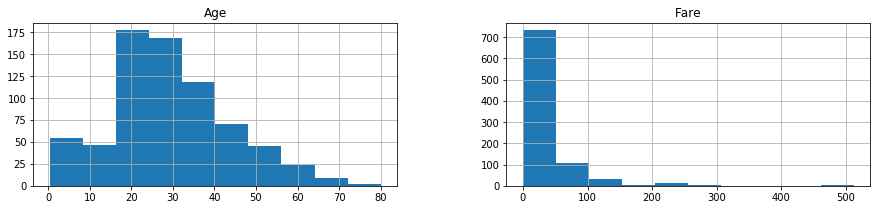

In [15]:
#plot histogram of continuous variables 
dat_train[['Age', 'Fare']].hist(bins=10, figsize=(15,3));

- Majority of passenger are in their twenties to fourties - Most ship fare ranges from 0 to 50

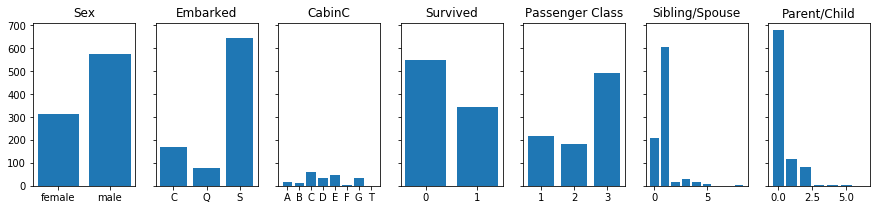

In [16]:
#plot histogram for categorical variables 
fig, axs = plt.subplots(1, 7, figsize=(15, 3), sharey=True) #7 panels plot  

axs[0].bar(dat_train['Sex'].unique(),dat_train['Sex'].value_counts()); #drop NA for embarked, otherwise cannot be plotted 
axs[1].bar(dat_train.Embarked[dat_train['Embarked'].notnull()].unique(),dat_train['Embarked'].value_counts()); 
axs[2].bar(dat_train.CabinC[dat_train['CabinC'].notnull()].unique(),dat_train['CabinC'].value_counts()); 
axs[3].bar(dat_train['Survived'].unique(),dat_train['Survived'].value_counts()); 
axs[4].bar(dat_train['Pclass'].unique(),dat_train['Pclass'].value_counts()); 
axs[5].bar(dat_train['SibSp'].unique(),dat_train['SibSp'].value_counts()); 
axs[6].bar(dat_train['Parch'].unique(),dat_train['Parch'].value_counts());  

axs[0].title.set_text('Sex') 
axs[1].title.set_text('Embarked') 
axs[2].title.set_text('CabinC') 
axs[3].title.set_text('Survived') 
axs[4].title.set_text('Passenger Class') 
axs[5].title.set_text('Sibling/Spouse') 
axs[6].title.set_text('Parent/Child')

- Male is approximately 50% more than female. 
- Most titanic passengers embarked from Southampton, approximately 60%. 
- Cabin Class has too many missing values. 
- Ticket class (Passenger class) of 1 and 2 are approximately the same; ticket class=3 is approximately double that of class=1 or class=2. 
- Most titanic passengers are traveling with 1 sibling/spouse and they have no parent/child with them.

## Replacing Missing Values 
Recall from the above that in the training dataset, some 'age', 'embarked' and many 'cabin' data are missing. 
- replace missing age and embarked with median age and mode embarked respectively 
- drop 'Cabin' column for now, not informative, not sure how to impute missing values

In [17]:
dat_train['AgeNew'] = dat_train['Age'] 
dat_train['AgeNew'] = dat_train['AgeNew'].fillna(28)  #median age is 28

In [18]:
dat_train['EmbarkedNew'] = dat_train['Embarked'] 
dat_train['EmbarkedNew'] = dat_train['EmbarkedNew'].fillna('S')  #mode embarked is Southampton dat_train
dat_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinC,AgeNew,EmbarkedNew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,35.0,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,28.0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,54.0,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,2.0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,27.0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,14.0,C


## Training Models 
Now we are ready to train some models with the clean data

In [18]:
#only select some features to train the model 
train_clean = dat_train['PassengerId', 'Pclass','Sex','AgeNew','SibSp','Parch','Ticket','Fare','EmbarkedNew']

KeyError: ('PassengerId', 'Pclass', 'Sex', 'AgeNew', 'SibSp', 'Parch', 'Ticket', 'Fare', 'EmbarkedNew')